<a href="https://colab.research.google.com/github/zakariajaadi/data-science-portofolio/blob/main/Normality%20Beyond%20the%20Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
In this notebook, we randomly generate three types of data:

* **Normal Data:** Follows a normal distribution.
* **Skewed Data:** Non-normal data with asymmetry.
* **Bimodal Data:** Non-normal data with two peaks.

**Goal:** 🎯 We apply various methods to assess normality and expect them to confirm normality only for the normal data while detecting deviations in the skewed and bimodal datasets.

# 1. Generating random data



In [7]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, normaltest, kstest


In [2]:
# @title
# 1. Generate random normally distributed data
# for reproducibility
np.random.seed(42)

mu = 50  # mean
sigma = 10  # standard deviation
n_samples = 1000

normal_data = np.random.normal(mu, sigma, n_samples)

# 2. Generate skewed data (not normal)

skewed_data = np.random.exponential(scale=2, size=n_samples)

# 3. Generate bimodal data (two combined normal distributions) (not normal)
mu1, mu2 = 30, 70
sigma1, sigma2 =5, 8

norm_data1 = np.random.normal(mu1, sigma1, int(n_samples/2))
norm_data2 = np.random.normal(mu2, sigma2, int(n_samples/2))
bimodal_data = np.concatenate([norm_data1, norm_data2])

# 2. Assessing normality with Histograms and KDE (Visually)

* **Histogram** is a graphical representation of the distribution of a dataset, where the data is divided into intervals or "bins," and the frequency (count) of data points that fall within each bin is shown by the height of the bars. It is a useful tool for visualizing the underlying distribution and patterns of continuous or discrete data.

* **KDE** : a method for smoothing a histogram to create a continuous curve that represents the data distribution

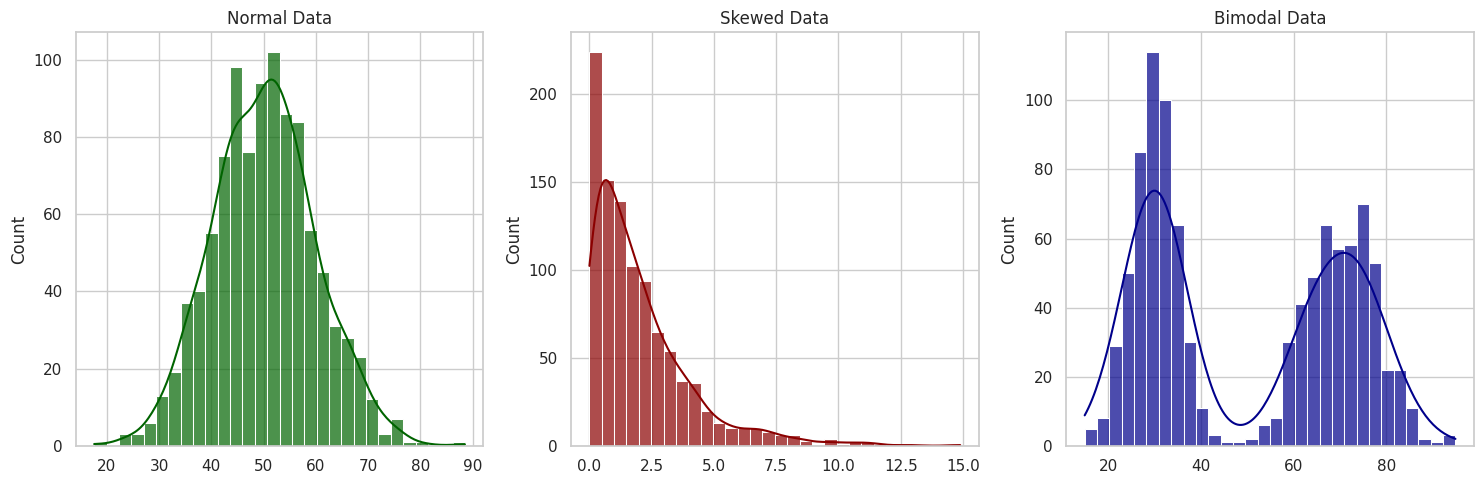

In [3]:
# @title
# Plot Histograms using Seaborn

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

# Normal Data Histogram
plt.subplot(1, 3, 1)
sns.histplot(normal_data, bins=30, kde=True, color='darkgreen', alpha=0.7)
plt.title('Normal Data')

# Skewed Data Histogram
plt.subplot(1, 3, 2)
sns.histplot(skewed_data, bins=30, kde=True, color='darkred', alpha=0.7)
plt.title('Skewed Data')

# Bimodal Data Histogram
plt.subplot(1, 3, 3)
sns.histplot(bimodal_data, bins=30, kde=True, color='darkblue', alpha=0.7)
plt.title('Bimodal Data')

plt.tight_layout()
plt.show()


**Interpretation:** 💡 As expected, the histograms and KDEs show that the "Normal Data" closely follows a bell-shaped normal distribution, while the "Skewed Data" deviates from normality due to its asymmetry, exhibiting positive skewness with a long right tail. Meanwhile, the "Bimodal Data" is also non-normal, displaying two distinct peaks.

**Pros:** 💪

* **Shape of distribution:** Histograms & KDEs are good at showing the overall shape of the distribution, including multimodality.

**Cons:** 👎

* **Visual limitation:** they might not be sensitive enough to detect subtle deviations from normality, especially in smaller datasets. It's challenging to definitively say "yes, this is normal" or "no, this is not normal" just by looking at these plots.

* **Subjectivity:** The appearance of a histogram can change significantly depending on the number of bins we choose, with too few bins, you might miss important details, and with too many, the histogram can look noisy and difficult to interpret. The same thing applies in KDEs with their smoothing parameter (band width). This subjectivity can lead to different conclusions about normality.


# 3. Assessing normality with Box Plots (Visually)
For normally distributed data :
* The box (IQR) is symmetrically centered around the median.
* The median (central line) is roughly in the middle of the box.
* The whiskers (lines extending from the box) are roughly equal in length.
* There are few or no outliers (points outside the whiskers).

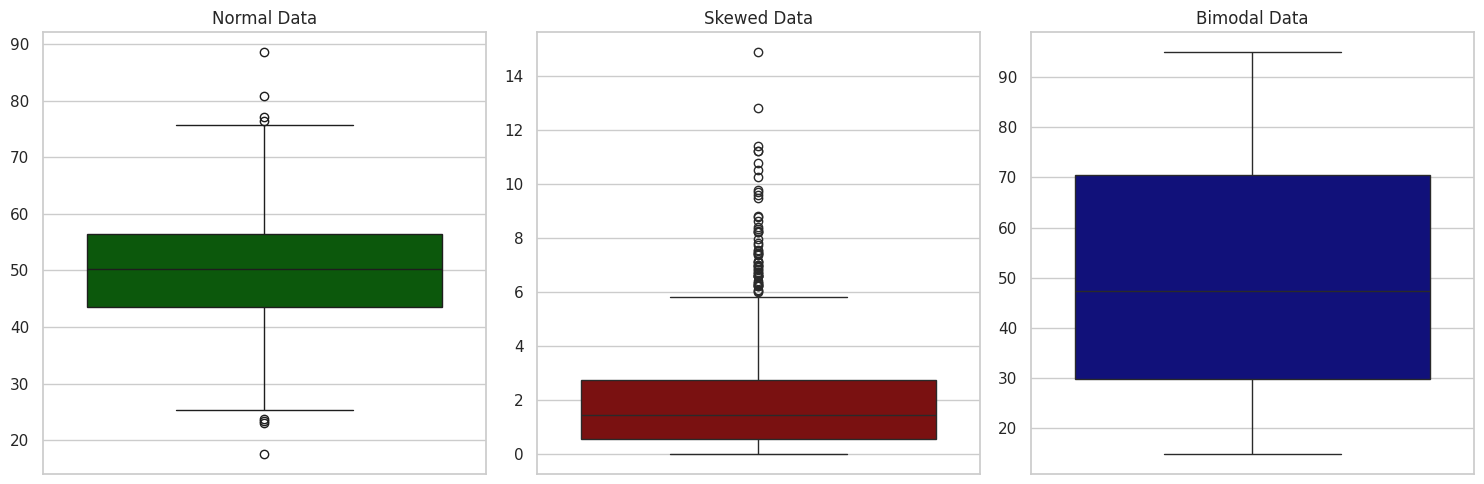

In [4]:
# @title
#Plot Boxplots using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=normal_data,color="darkgreen")
plt.title('Normal Data')

plt.subplot(1, 3, 2)
sns.boxplot(data=skewed_data,color="darkred")
plt.title('Skewed Data')

plt.subplot(1, 3, 3)
sns.boxplot(data=bimodal_data,color="darkblue")
plt.title('Bimodal Data')

plt.tight_layout()
plt.show()

**Interpretation**: 💡

* **Normal Data**: The box is symmetrically centered around the median, with approximately equal whiskers, confirming that the data follows a normal distribution.
* **Skewed Data:** The upper whisker is longer, and outliers appear on the right, indicating positive skewness. This asymmetry suggests that the data is not normally distributed.
* **Bimodal data**: A boxplot alone may not clearly reveal bimodality since it summarizes data with quartiles, which can hide multiple peaks. It might resemble the normal data, other visualization like histograms/KDE, QQ plots are better suited to detect bimodal distributions.

**Pros:** 💪
* Box plots are powerful for detecting skewness and identifying outliers.

**Cons:** 👎
* **Visual limitation:**  Boxplots are less informative about the shape of the distribution than histograms or KDEs.


# 4. Assessing normality with Violin Plots (Visually)
Violin plots look sassy ✨, but they're just a stylish blend of box plots and KDEs


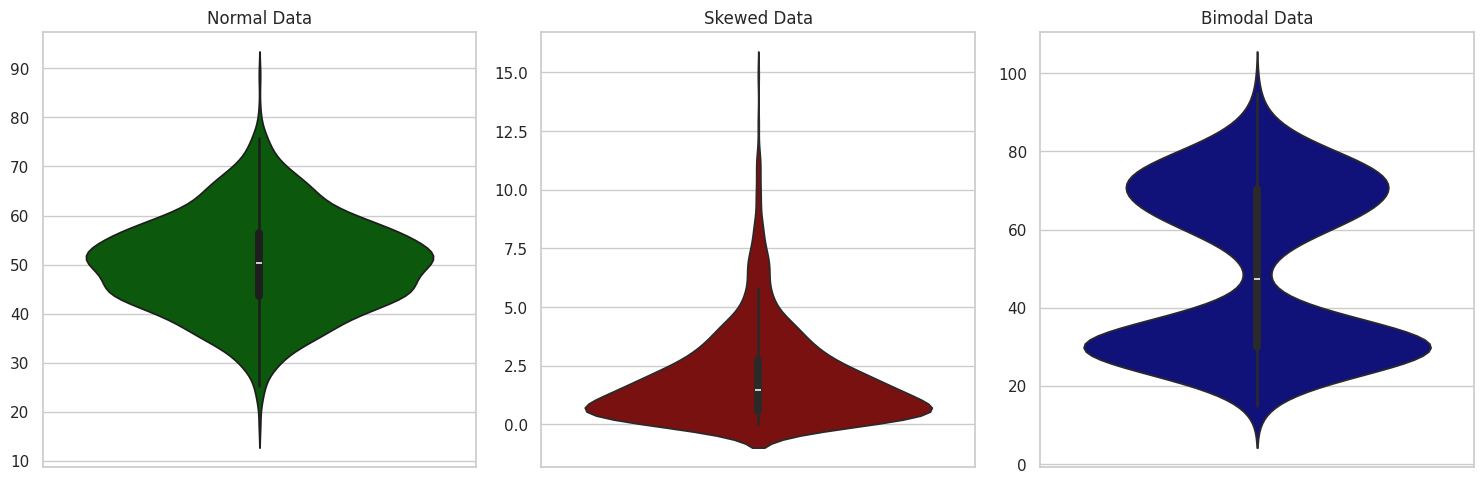

In [5]:
# @title
# Plot ViolinPlots using Seaborn
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.violinplot(data=normal_data,color="darkgreen")
plt.title('Normal Data')

plt.subplot(1, 3, 2)
sns.violinplot(data=skewed_data,color="darkred")
plt.title('Skewed Data')

plt.subplot(1, 3, 3)
sns.violinplot(data=bimodal_data,color="darkblue")
plt.title('Bimodal Data')

plt.tight_layout()
plt.show()


**Interpretation:** 💡: same as the boxplot

**Pros:** 💪
* Combines box plot and KDE
* Highlights symmetry and skewness

**Cons** 👎 :
* Same subjectivity con of KDE


#5. Assessing normality with Q-Q plot (Visually)

## Some theory : 🧠
A probability plot visually assesses whether your data follows a specific theoritical distribution (like normal) by comparing the observed quantiles of your data to the theoretical quantiles of that distribution. If the points align along a straight line, it suggests a good fit.

**Observed quantiles:** These are the quantiles derived from your data. When you sort your data, the smallest value corresponds to the first quantile, and the largest corresponds to the last quantile.

**Theoretical quantiles:** These are the quantile values from a theoretical distribution (e.g., normal). They represent the values you would expect to see if your data perfectly followed that distribution.

Simply put:

* 10 sorted data points give you 10 observed quantiles corresponding to the distribution of your data.
* You compare them to 10 theoretical quantiles — values from the theoretical distribution at the 10%, 20%, ..., 100% percentiles.
* If the points lie along a straight line, it suggests that your data follows the theorotical distribution

## Let's plot QQ plots for our data
Now to check if the data we’ve generated follows a normal distribution, we'll use the ```scipy.stats.probplot``` function.

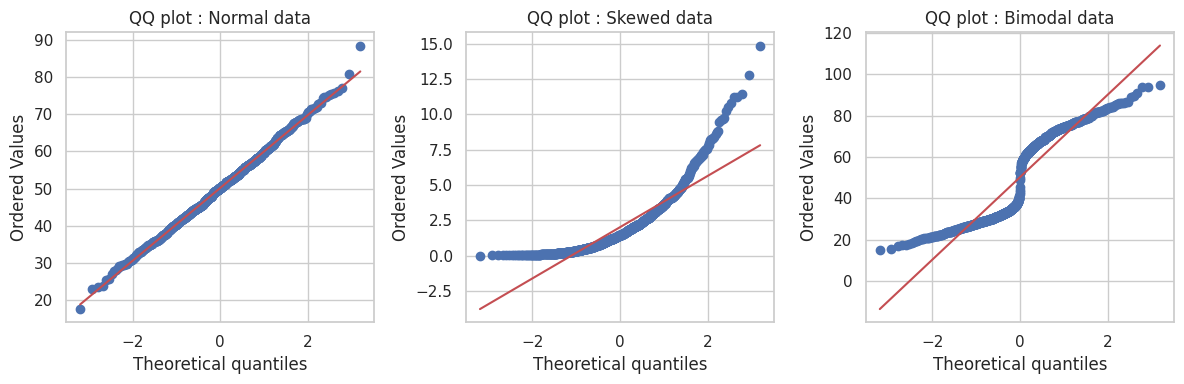

In [6]:
# @title
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
stats.probplot(normal_data, dist="norm", plot=axes[0])
axes[0].set_title('QQ plot : Normal data')

stats.probplot(skewed_data, dist="norm", plot=axes[1])
axes[1].set_title('QQ plot : Skewed data')

stats.probplot(bimodal_data, dist="norm", plot=axes[2])
axes[2].set_title('QQ plot : Bimodal data')

plt.tight_layout()
plt.show()

**Interpretaion :** 💡 As expected, The QQ plot for normal data shows points aligned along a straight line, indicating normality, while the plot for skewed data deviates at the tails, suggesting non-normality due to skewness, and the plot for bimodal data forms an "S" shape, reflecting bimodality (multiple peaks/modes) and further indicating non-normality.

**Pros:** 💪
* QQ plots provide a direct approach to assess normality by comparing sample quantiles with theoretical quantiles, making them a more rigorous and diagnostic tool compared to the previous methods
* QQ plots are particularly good at detecting deviations from normality in the tails of the distribution

**Cons:**
* **Subjectivity:** While less subjective than methods seen before, QQ plot interpretation still relies on visual judgment.

##6. Assessing normality with Hypothesis testing
In this section, we'll explore how hypothesis tests can be used to assess the normality of a dataset.

Unlike visual methods such as histograms or QQ plots, hypothesis tests provide a formal statistical approach to determine whether the data significantly deviates from a normal distribution.

For each test, we'll obtain a test statistic (such as the t-statistic) and a p-value, which will help us determine if the null hypothesis of normality can be rejected.

We’ll use an alpha level of 0.05 to interpret the results: a p-value below 0.05 suggests that the data significantly deviates from normality, while a p-value above 0.05 indicates that the data is consistent with a normal distribution. We'll cover tests like the Shapiro-Wilk test, Anderson-Darling test, and others, and discuss how to interpret their results.

## Shapiro-Wilk Test

In [11]:
stat, p = shapiro(normal_data)
print(f"Shapiro-Wilk Test (normal_data): W={stat:.3f}, p={p:.3f}" , end=" → ")
if p > 0.05:
    print("Data is likely normal")
else:
    print("Data deviates from normality")

stat, p = shapiro(skewed_data)
print(f"Shapiro-Wilk Test (skewed_data): W={stat:.3f}, p={p:.3f}",end=" → ")
if p > 0.05:
    print("Data is likely normal")
else:
    print("Data deviates from normality")

stat, p = shapiro(bimodal_data)
print(f"Shapiro-Wilk Test (bimodal_data): W={stat:.3f}, p={p:.3f}",end=" → ")
if p > 0.05:
    print("Data is likely normal")
else:
    print("Data deviates from normality")


Shapiro-Wilk Test (normal_data): W=0.999, p=0.627 → Data is likely normal
Shapiro-Wilk Test (skewed_data): W=0.816, p=0.000 → Data deviates from normality
Shapiro-Wilk Test (bimodal_data): W=0.869, p=0.000 → Data deviates from normality


**Interpretation:** 💡 as expected only "normal data" passed the normality test 🙂


# Agostino-Pearson test

In [12]:
from scipy.stats import normaltest  # D'Agostino-Pearson's test

# Normal Data
stat, p = normaltest(normal_data)
print(f"D'Agostino-Pearson Test: χ²={stat:.3f}, p={p:.3f}", end=" → ")
if p > 0.05:
    print("Data is likely normal")
else:
    print("Data deviates from normality")

# Skewed Data
stat, p = normaltest(skewed_data)
print(f"D'Agostino-Pearson Test: χ²={stat:.3f}, p={p:.3f}",end=" → ")
if p > 0.05:
    print("Data is likely normal")
else:
    print("Data deviates from normality")

# Bimodal Data
stat, p = normaltest(bimodal_data)
print(f"D'Agostino-Pearson Test: χ²={stat:.3f}, p={p:.3f}",end=" → ")
if p > 0.05:
    print("Data is likely normal")
else:
    print("Data deviates from normality")

D'Agostino-Pearson Test: χ²=2.576, p=0.276 → Data is likely normal
D'Agostino-Pearson Test: χ²=422.699, p=0.000 → Data deviates from normality
D'Agostino-Pearson Test: χ²=5262.991, p=0.000 → Data deviates from normality


**Interpretation:** 💡 as expected only "normal data" passed the normality test 🙂


# kolmogorov-Smirnov test


In [13]:
from scipy.stats import kstest

# Normal Data
stat, p = kstest(normal_data, 'norm') # 'norm' specifies standard normal
print(f"Kolmogorov-Smirnov Test (Normal Data): D={stat:.3f}, p={p:.3f}",end=" → ")
if p > 0.05:
    print("Data is likely normal")
else:
    print("Data deviates from normality")

# Skewed Data
stat, p = kstest(skewed_data, 'norm')
print(f"Kolmogorov-Smirnov Test (Skewed Data): D={stat:.3f}, p={p:.3f}",end=" → ")
if p > 0.05:
    print("Data is likely normal")
else:
    print("Data deviates from normality")

# Bimodal Data
stat, p = kstest(bimodal_data, 'norm')
print(f"Kolmogorov-Smirnov Test (Bimodal Data): D={stat:.3f}, p={p:.3f}",end=" → ")
if p > 0.05:
    print("Data is likely normal")
else:
    print("Data deviates from normality")

Kolmogorov-Smirnov Test (Normal Data): D=1.000, p=0.000 → Data deviates from normality
Kolmogorov-Smirnov Test (Skewed Data): D=0.503, p=0.000 → Data deviates from normality
Kolmogorov-Smirnov Test (Bimodal Data): D=1.000, p=0.000 → Data deviates from normality


**Interpretation:** 💡 The results were unexpected 😠 ! All data, including the "normal data," failed the normality test. This highlights a common limitation of using statistical tests to assess normality in large datasets (explained further in the cons section below).

**Pros**: 💪
* **Formal and Objective:** Statistical tests offer a formal, objective way to assess normality, unlike visual methods.

**Statstical tests cons:** 👎
* **For Small Datasets (Generally < 30):** Normality tests often lack power with and they may fail to detect deviations from normality.
* **Large Datasets (Generally > a few hundred):**  With large samples, normality tests become overly sensitive 📢.  Even tiny, practically insignificant deviations from perfect normality can lead to a statistically significant result (a low p-value). And this happend in our example with Kolmogorov-Smirnov test.

# Conclusion

After applying multiple methods to assess normality, it is clear that no single test is universally perfect. Instead, the choice of method should depend on the dataset size, sensitivity to deviations, and the assumptions of subsequent analyses.


**Best Practice :**
For a robust normality assessment, combining a statistical test (e.g., Shapiro-Wilk) with a visual inspection (e.g., QQ-plot) is recommended. If normality is crucial for an analysis, consider data transformations (e.g., log or Box-Cox) when normality assumptions are violated.

<p align="center">
  <img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExZDA4a2NxNmtvYjJiMzBjaG5meXd4eHpuMW41emh1OTM3NWVobG85OSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lD76yTC5zxZPG/giphy.gif" alt="Alt text">
</p>
